In [1]:
library(dplyr)
library(tidyr)
library(lfe)
library(stargazer)
library(stringr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [2]:
df <- data.table::fread('/pool001/mfzhao/PROCESSED_DATA/dyadic_mvmt_2020.csv')

In [3]:
df %>% 
    filter(origin_cluster != destination_cluster) %>%
    mutate(oRain  = as.numeric(oPRCP > 0),
           dRain  = as.numeric(dPRCP > 0),
           nearby = as.numeric(dist < 100)) -> df

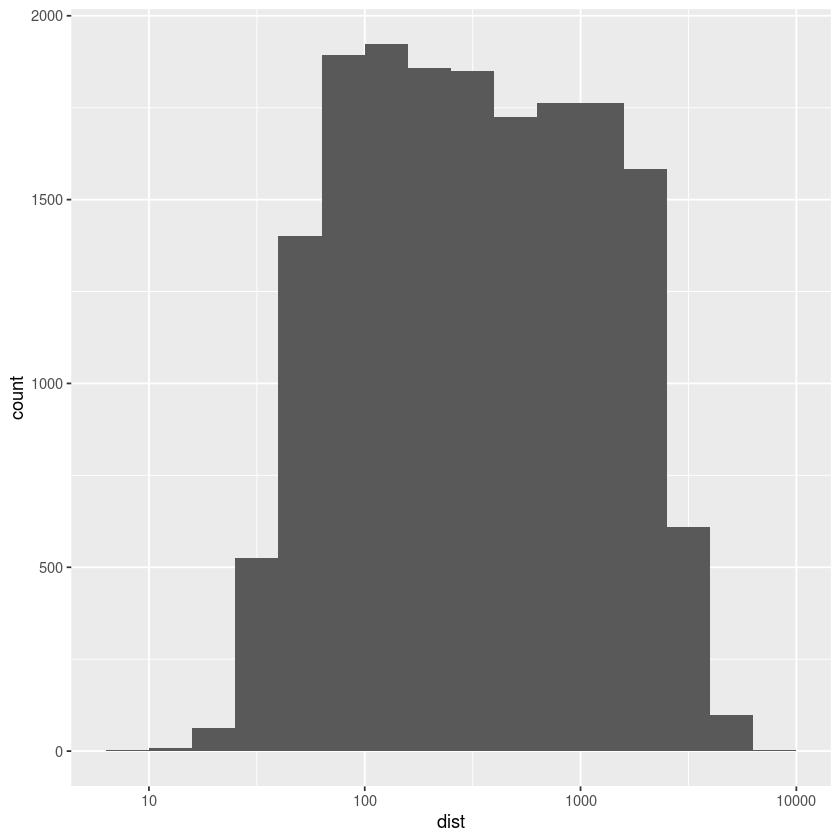

In [4]:
df %>%
    select(dyad, dist) %>%
    distinct()%>%
    ggplot(aes(x = dist)) +
    geom_histogram(binwidth = 0.2, center = 0.1) +
    scale_x_log10()

In [7]:
df %>%
    select(-matches('op[123]:dp[123]')) %>%
    mutate(op1 = ifelse(op2 == 1 | op3 == 1, 0, op1),
           op2 = ifelse(op3 == 1, 0, op2)) -> df.op_mex

df %>%
    select(-matches('op[123]:dp[123]')) %>%
    mutate(dp1 = ifelse(dp2 == 1 | dp3 == 1, 0, dp1),
           dp2 = ifelse(dp3 == 1, 0, dp2)) -> df.dp_mex

In [22]:
df %>%
    filter(nearby == 1) -> dfc

df %>%
    filter(nearby == 0) -> dfnc

In [23]:
fit1 <- felm(log(ndotd) ~  op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df)
fit2 <- felm(log(pdotd) ~  op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)
fit3 <- felm(log(ndotd) ~  op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, dfc)
fit4 <- felm(log(pdotd) ~  op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, dfc, weights = dfc$n)
fit5 <- felm(log(ndotd) ~  op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, dfnc)
fit6 <- felm(log(pdotd) ~  op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, dfnc, weights = dfnc$n)

In [25]:
stargazer(fit1, fit3, fit5, fit2, fit4, fit6)


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, Aug 07, 2020 - 11:47:19 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{3}{c}{log(ndotd)} & \multicolumn{3}{c}{log(pdotd)} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 op1 & $-$0.009 & 0.012 & $-$0.016 & 0.002 & 0.085 & 0.0005 \\ 
  & (0.027) & (0.025) & (0.035) & (0.034) & (0.051) & (0.035) \\ 
  & & & & & & \\ 
 op2 & $-$0.040 & $-$0.117$^{***}$ & $-$0.012 & 0.081$^{***}$ & $-$0.137$^{***}$ & 0.090$^{***}$ \\ 
  & (0.026) & (0.034) & (0.026) & (0.029) & (0.045) & (0.029) \\ 
  & & & & & & \\ 
 op3 & 0.068$^{*}$ & 0.106$^{***}$ & 0.065 & 0.001 & 0.090$^{**}$ & 0.002 \\ 
  & (0.040) & (0.036) & (0.044) & (0.055) & (0.044) & (0.061) \\ 
  & 

In [15]:
df %>%
    select(-matches('op[123]:dp[123]')) %>%
    mutate_at(vars(matches('[od]p[123]')), 
              .funs = list(c  = function(x) x * .$nearby, 
                           nc = function(x) x * (1 - .$nearby))) -> df2

In [20]:
fit3 <- felm(log(ndotd) ~
                          op1_c  + op2_c  + op3_c  + dp1_c  + dp2_c  + dp3_c + 
                          op1_nc + op2_nc + op3_nc + dp1_nc + dp2_nc + dp3_nc
             | dyad + date | 0 | origin_cluster + destination_cluster, df2)
fit4 <- felm(log(pdotd) ~ 
                          op1_c  + op2_c  + op3_c  + dp1_c  + dp2_c  + dp3_c + 
                          op1_nc + op2_nc + op3_nc + dp1_nc + dp2_nc + dp3_nc
             | dyad + date | 0 | origin_cluster + destination_cluster, df2, weights = df$n)

In [21]:
stargazer(fit3, fit4)


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, Aug 07, 2020 - 11:31:20 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & log(ndotd) & log(pdotd) \\ 
\\[-1.8ex] & (1) & (2)\\ 
\hline \\[-1.8ex] 
 op1\_c & 0.051$^{*}$ & 0.051 \\ 
  & (0.029) & (0.043) \\ 
  & & \\ 
 op2\_c & $-$0.013 & $-$0.030 \\ 
  & (0.056) & (0.067) \\ 
  & & \\ 
 op3\_c & 0.052 & 0.036 \\ 
  & (0.040) & (0.043) \\ 
  & & \\ 
 dp1\_c & 0.049 & $-$0.013 \\ 
  & (0.034) & (0.051) \\ 
  & & \\ 
 dp2\_c & 0.012 & 0.010 \\ 
  & (0.064) & (0.063) \\ 
  & & \\ 
 dp3\_c & 0.111$^{***}$ & 0.117$^{***}$ \\ 
  & (0.031) & (0.029) \\ 
  & & \\ 
 op1\_nc & $-$0.025 & 0.002 \\ 
  & (0.036) & (0.036) \\ 
  & & \\ 
 op2\_nc & $-$0.050$^{**}$ & 0.083$^{***}$ \\ 
  & (0.024) & (0.03

In [191]:
as.data.frame(summary(fit3)$coef) %>%
     mutate(var  = rownames(.),
            dv   = 'pdotd', 
            type = ifelse(str_detect(var, '_nc'), 'distant', 'nearby'),
            var  = str_replace(var, '_n?c', '')) %>%
    bind_rows(as.data.frame(summary(fit4)$coef) %>% 
              mutate(var  = rownames(.),
                     dv   = 'ndotd', 
                     type = ifelse(str_detect(var, '_nc'), 'distant', 'nearby'),
                     var  = str_replace(var, '_n?c', ''))) %>%
    rename(estimate = Estimate, se = `Cluster s.e.`) %>%
    bind_rows(as.data.frame(summary(fit1)$coef) %>%
              mutate(var = rownames(.),
                     dv = 'pdotd') %>%
              bind_rows(as.data.frame(summary(fit2)$coef) %>%
                        mutate(var = rownames(.),
                               dv = 'ndotd')) %>%
              rename(estimate = Estimate, se = `Cluster s.e.`) %>%
              mutate(type = 'all')) %>%
    filter(!str_detect(var, 'Rain'), !str_detect(var, 'TMAX')) -> temp

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”


In [192]:
options(repr.plot.width=15, repr.plot.height=10)
temp %>%
    mutate(od = ifelse(str_detect(var, 'op'), 'origin policy', 'destination policy'),
           od = factor(od, c('origin policy', 'destination policy')),
           var = ifelse(str_detect(var, 'p1'), 'ip', 
                        ifelse(str_detect(var, 'p2'), 'sh', 'ro')),
           var = factor(var, levels = c('ip', 'sh', 'ro'))) %>%
    ggplot(aes(x = var, y = estimate, color = type)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 3) +
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(0.5), size = 1) +
    xlab('') + 
    ylab('') +
    facet_grid(dv ~ od, scales = 'free_x') +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p

ggsave('/home/mfzhao/p3.pdf', p, device = 'pdf', width = 6.5, height = 5, scale = 2)

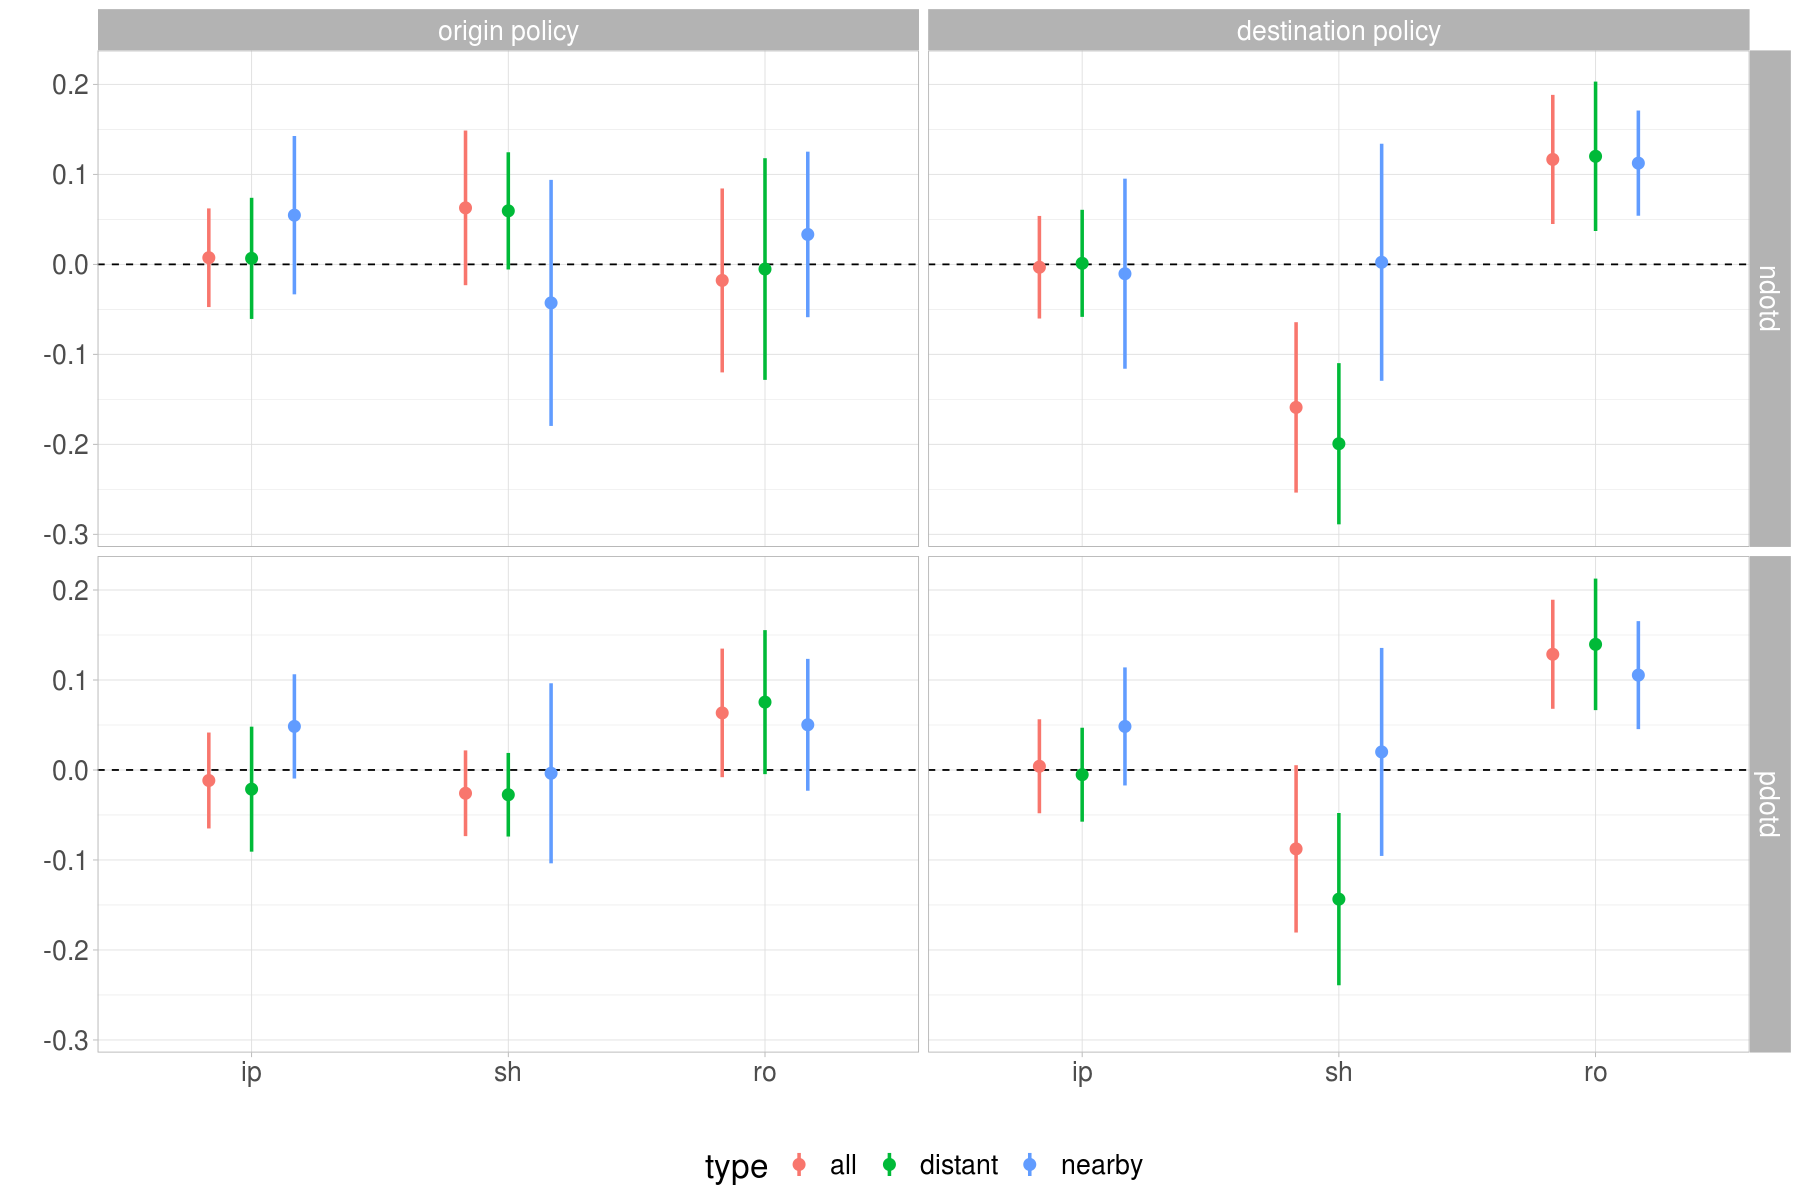

In [193]:
p

In [190]:
temp %>% 
    mutate(impact = (exp(estimate) - 1) * 100) %>%
    filter(type == 'all')

estimate,se,t value,Pr(>|t|),var,dv,type,impact
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
-0.011670421,0.02691602,-0.4335865,0.6664537538,op1,pdotd,all,-1.1602586
-0.025887447,0.02405473,-1.0761895,0.2870080123,op2,pdotd,all,-2.5555240
0.063412985,0.03608703,1.7572236,0.0850014653,op3,pdotd,all,6.5466771
0.004135980,0.02636809,0.1568555,0.8759904286,dp1,pdotd,all,0.4144545
-0.087670940,0.04695092,-1.8672890,0.0677290109,dp2,pdotd,all,-8.3937734
0.128580546,0.03061631,4.1997401,0.0001097737,dp3,pdotd,all,13.7213016
0.007376517,0.02768334,0.2664605,0.7909804155,op1,ndotd,all,0.7403791
0.062750248,0.04339900,1.4458916,0.1544470644,op2,ndotd,all,6.4760879
-0.017855673,0.05162324,-0.3458844,0.7308807653,op3,ndotd,all,-1.7697205


In [71]:
df.op_mex %>%
    mutate(o   = ifelse(op3 == 1, 'p3', 
                     ifelse(op2 == 1, 'p2', 
                        ifelse(op1 == 1, 'p1', 'p0'))),
           dp0 = 1) -> df.op_mex

bind_rows(as.data.frame(model.matrix(ndotd ~ 0 + o * (dp0 + dp1 + dp2 + dp3), df.op_mex)))

In [93]:
df.op_mex %>%
    select(date, dyad, origin_cluster, destination_cluster, n, nearby, bordering, dist, 
           ndotd, pdotd, oRain, dRain, oTMAX, dTMAX) %>%
    bind_cols(as.data.frame(model.matrix(ndotd ~ 0 + o * (dp0 + dp1 + dp2 + dp3), df.op_mex))) -> df.opex

In [94]:
df.opex %>%
    mutate(`op0:dp0` = op0 * dp0,
           `op0:dp1` = op0 * dp1,
           `op0:dp2` = op0 * dp2,
           `op0:dp3` = op0 * dp3) -> df.opex

colnames(df.opex) <- str_replace(colnames(df.opex), ':', '_')

In [12]:
df %>% 
   mutate(o = ifelse(op3 == 1, 'p3', 
                     ifelse(op2 == 1, 'p2', 
                            ifelse(op1 == 1, 'p1', 'p0'))),
          d = ifelse(dp3 == 1, 'p3', 
                     ifelse(dp2 == 1, 'p2', 
                            ifelse(dp1 == 1, 'p1', 'p0'))),
          OD = str_c('o', o, ':', 'd', d)) -> df2

df2 %>%
    filter(nearby == 1) -> df2c


df2 %>%
    filter(nearby == 0) -> df2nc

In [13]:
fit7 <- felm(log(ndotd) ~ OD
             | dyad + date | 0 | origin_cluster + destination_cluster, df2)
fit8 <- felm(log(pdotd) ~  OD
             | dyad + date | 0 | origin_cluster + destination_cluster, df2, weights = df2$n)

fit9 <- felm(log(ndotd) ~ OD
             | dyad + date | 0 | origin_cluster + destination_cluster, df2c)
fit10 <- felm(log(pdotd) ~  OD
             | dyad + date | 0 | origin_cluster + destination_cluster, df2c, weights = df2c$n)

fit11 <- felm(log(ndotd) ~ OD
             | dyad + date | 0 | origin_cluster + destination_cluster, df2nc)
fit12 <- felm(log(pdotd) ~  OD
             | dyad + date | 0 | origin_cluster + destination_cluster, df2nc, weights = df2nc$n)

Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = 

In [27]:
fit7 <- felm(log(ndotd) ~ (op1 + op2 + op3) * (dp1 + dp2 + dp3)
             | dyad + date | 0 | origin_cluster + destination_cluster, df)
fit8 <- felm(log(pdotd) ~  (op1 + op2 + op3) * (dp1 + dp2 + dp3)
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)

fit9 <- felm(log(ndotd) ~ (op1 + op2 + op3) * (dp1 + dp2 + dp3)
             | dyad + date | 0 | origin_cluster + destination_cluster, dfc)
fit10 <- felm(log(pdotd) ~  (op1 + op2 + op3) * (dp1 + dp2 + dp3)
             | dyad + date | 0 | origin_cluster + destination_cluster, dfc, weights = dfc$n)

fit11 <- felm(log(ndotd) ~ (op1 + op2 + op3) * (dp1 + dp2 + dp3)
             | dyad + date | 0 | origin_cluster + destination_cluster, dfnc)

fit12 <- felm(log(pdotd) ~  (op1 + op2 + op3) * (dp1 + dp2 + dp3)
             | dyad + date | 0 | origin_cluster + destination_cluster, dfnc, weights = dfnc$n)

summary(fit7)

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is e


Call:
   felm(formula = log(ndotd) ~ (op1 + op2 + op3) * (dp1 + dp2 +      dp3) | dyad + date | 0 | origin_cluster + destination_cluster,      data = df) 

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0285 -0.3112  0.0257  0.3449  4.1113 

Coefficients:
         Estimate Cluster s.e. t value Pr(>|t|)  
op1      0.024390     0.028607   0.853   0.3980  
op2     -0.005818     0.035239  -0.165   0.8695  
op3      0.175039     0.068876   2.541   0.0142 *
dp1      0.038159     0.034166   1.117   0.2694  
dp2     -0.134794     0.070122  -1.922   0.0603 .
dp3            NA     0.000000      NA       NA  
op1:dp1 -0.072132     0.027277  -2.644   0.0109 *
op1:dp2  0.119122     0.053639   2.221   0.0309 *
op1:dp3  0.068028     0.051934   1.310   0.1962  
op2:dp1  0.003828     0.041500   0.092   0.9269  
op2:dp2 -0.094462     0.038139  -2.477   0.0167 *
op2:dp3  0.064260     0.041160   1.561   0.1248  
op3:dp1        NA     0.000000      NA       NA  
op3:dp2 -0.110359     0.043458  -2.

In [14]:
stargazer(fit7, fit9, fit11, fit8, fit10, fit12)


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Mon, Aug 10, 2020 - 07:57:01 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{3}{c}{log(ndotd)} & \multicolumn{3}{c}{log(pdotd)} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 ODop0:dp1 & 0.035 & 0.031 & 0.029 & 0.055$^{*}$ & 0.050 & 0.055$^{*}$ \\ 
  & (0.034) & (0.026) & (0.034) & (0.030) & (0.033) & (0.030) \\ 
  & & & & & & \\ 
 ODop0:dp2 & $-$0.081 & $-$0.021 & $-$0.092 & $-$0.124$^{***}$ & $-$0.067 & $-$0.120$^{**}$ \\ 
  & (0.076) & (0.046) & (0.095) & (0.042) & (0.049) & (0.046) \\ 
  & & & & & & \\ 
 ODop1:dp0 & 0.028 & 0.039 & 0.017 & 0.065 & 0.101$^{*}$ & 0.066 \\ 
  & (0.030) & (0.026) & (0.039) & (0.040) & (0.053) & (0.042) \\ 
  & & &

In [15]:
df2

date,dyad,origin_cluster,destination_cluster,n,bordering,ndotd,pdotd,dist,oPRCP,⋯,op2:dp3,op3:dp1,op3:dp2,op3:dp3,oRain,dRain,nearby,o,d,OD
<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2020-01-01,01001->13121,1,13,55601,0,88,1.599709e-02,246.28540,0,⋯,0,0,0,0,0,0,0,p0,p0,op0:dp0
2020-01-01,01003->04013,1,4,218022,0,26,1.252348e-03,2351.89961,0,⋯,0,0,0,0,0,1,0,p0,p0,op0:dp0
2020-01-01,01003->12005,1,12,218022,0,24,1.156014e-03,208.17543,0,⋯,0,0,0,0,0,0,0,p0,p0,op0:dp0
2020-01-01,01003->12031,1,12,218022,0,11,5.298396e-04,582.48358,0,⋯,0,0,0,0,0,0,0,p0,p0,op0:dp0
2020-01-01,01003->12033,1,12,218022,1,998,4.807090e-02,34.00226,0,⋯,0,0,0,0,0,0,1,p0,p0,op0:dp0
2020-01-01,01003->12073,1,12,218022,0,15,7.225085e-04,331.98103,0,⋯,0,0,0,0,0,0,0,p0,p0,op0:dp0
2020-01-01,01003->12091,1,12,218022,0,83,3.997881e-03,108.30828,0,⋯,0,0,0,0,0,0,0,p0,p0,op0:dp0
2020-01-01,01003->12095,1,12,218022,0,179,8.621935e-03,666.99306,0,⋯,0,0,0,0,0,0,0,p0,p0,op0:dp0
2020-01-01,01003->12113,1,12,218022,0,107,5.153894e-03,66.94946,0,⋯,0,0,0,0,0,0,1,p0,p0,op0:dp0
